

Closing price of a stock is predicted

**Moving average(MA)** is a commonly used statistical indicator to analyze data trends over a specific period of time. It helps to smooth out fluctuations or noise in the data and provides a clearer picture of the underlying trend.
It is calculated by taking the average of a specified number of data points within a sliding window that moves through the dataset. As new data points become available, the window shifts, and the average is recalculated.

Strategy of Technical analyst to analyze stock
If the 100-day MA crosses above the 200-day MA, it suggests that the shorter-term average is rising faster than the longer-term average, indicating
**uptrend** and vice-versa

Offset is difference between original and predicted price

Data is scrapped from yahoo finance

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [ ]:
import yfinance as yf
start = '2013-06-10'
end = '2023-06-10'
ticker = "AAPL"
df = yf.download(ticker,start, end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-06-10,15.883214,16.038570,15.600000,15.674643,13.608679,450153200
2013-06-11,15.562143,15.812857,15.475714,15.628571,13.568677,286112400
2013-06-12,15.696429,15.758929,15.410714,15.435357,13.400932,265227200
2013-06-13,15.446429,15.612143,15.312500,15.570000,13.517827,285832400
2013-06-14,15.550000,15.581786,15.303571,15.358929,13.334576,271866000


In [ ]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-06-10,15.883214,16.038570,15.600000,15.674643,13.608679,450153200
1,2013-06-11,15.562143,15.812857,15.475714,15.628571,13.568677,286112400
2,2013-06-12,15.696429,15.758929,15.410714,15.435357,13.400932,265227200
3,2013-06-13,15.446429,15.612143,15.312500,15.570000,13.517827,285832400
4,2013-06-14,15.550000,15.581786,15.303571,15.358929,13.334576,271866000


In [ ]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()


,Open,High,Low,Close,Volume
0,15.883214,16.038570,15.600000,15.674643,450153200
1,15.562143,15.812857,15.475714,15.628571,286112400
2,15.696429,15.758929,15.410714,15.435357,265227200
3,15.446429,15.612143,15.312500,15.570000,285832400
4,15.550000,15.581786,15.303571,15.358929,271866000


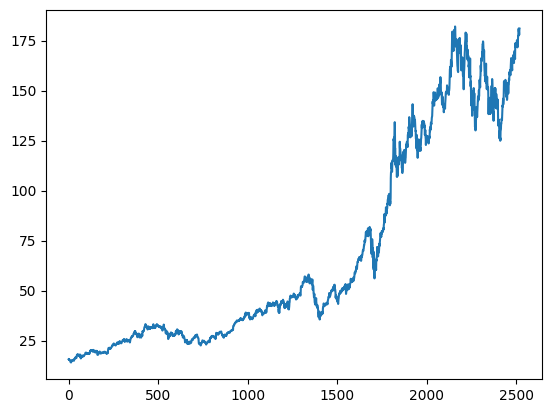

In [ ]:
plt.plot(df.Close)

In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2514    158.5541
2515    159.0113
2516    159.4554
2517    159.9135
2518    160.3637
Name: Close, Length: 2519, dtype: float64

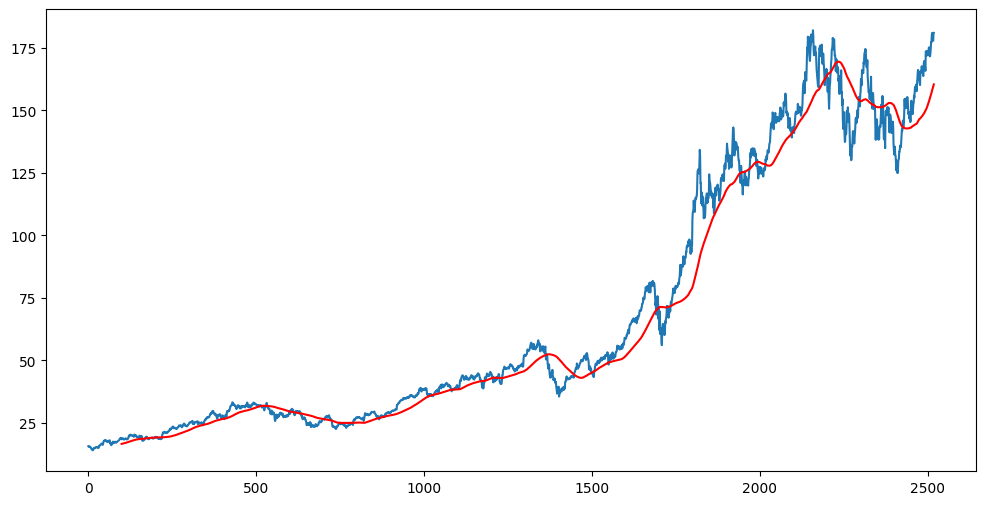

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2514    152.48990
2515    152.51520
2516    152.54670
2517    152.61170
2518    152.68035
Name: Close, Length: 2519, dtype: float64

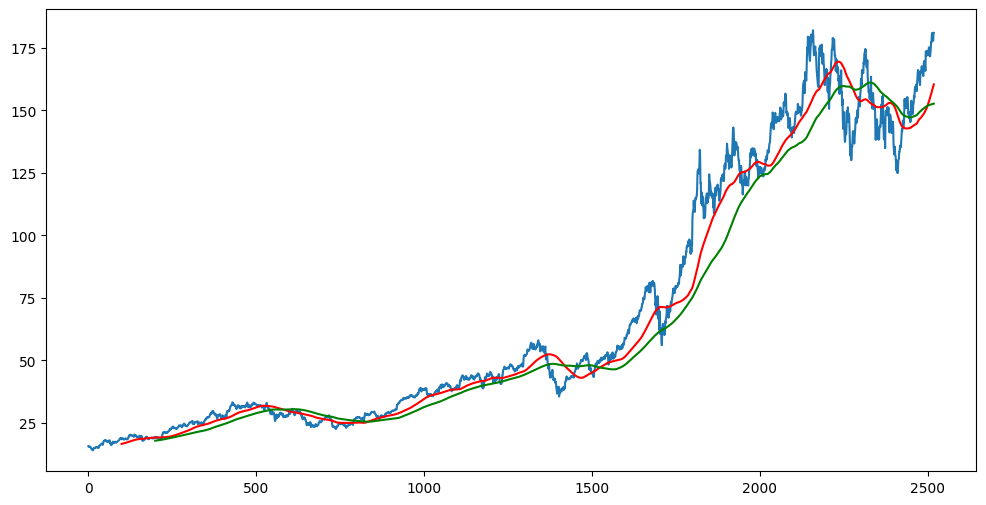

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [ ]:
df.shape

(2519, 5)

Splitting data into training and testing

In [ ]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing  =  pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(1763, 1)
(756, 1)


In [ ]:
data_training.head()

,Close
0,15.674643
1,15.628571
2,15.435357
3,15.570000
4,15.358929


In [ ]:
data_testing.head()

,Close
1763,88.209999
1764,83.974998
1765,84.699997
1766,85.747498
1767,88.019997


**MIN_MAX NORMALIZATION**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02239655],
       [0.02175607],
       [0.01907009],
       ...,
       [0.95659214],
       [0.96340392],
       [1.        ]])

In [ ]:
data_training_array.shape

(1763, 1)

In [ ]:
x_train = []
y_train = []
for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])

x_train , y_train = np.array(x_train),np.array(y_train)
print(x_train.shape)

(1663, 100, 1)


**LSTM ML MODEL**

LSTM (Long Short-Term Memory): LSTM is a type of recurrent neural network (RNN) architecture that is well-suited for processing and making predictions on sequences of data. LSTM networks have the ability to learn long-term dependencies in the data by using a memory cell and different types of gates to control the flow of information.


In [ ]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu',return_sequences= True,input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu',return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu',return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 [==============================] - 25s 351ms/step - loss: 0.0282
Epoch 2/50
52/52 [==============================] - 19s 376ms/step - loss: 0.0060
Epoch 3/50
52/52 [==============================] - 18s 352ms/step - loss: 0.0058
Epoch 4/50
52/52 [==============================] - 20s 379ms/step - loss: 0.0049
Epoch 5/50
52/52 [==============================] - 21s 401ms/step - loss: 0.0046
Epoch 6/50
52/52 [==============================] - 20s 379ms/step - loss: 0.0042
Epoch 7/50
52/52 [==============================] - 23s 451ms/step - loss: 0.0046
Epoch 8/50
52/52 [==============================] - 22s 417ms/step - loss: 0.0042
Epoch 9/50
52/52 [==============================] - 26s 503ms/step - loss: 0.0036
Epoch 10/50
52/52 [==============================] - 25s 476ms/step - loss: 0.0039
Epoch 11/50
52/52 [==============================] - 21s 397ms/step - loss: 0.0036
Epoch 12/50
52/52 [==============================] - 18s 351ms/step - loss: 0.0032
Epoch 13/50
5

In [ ]:
model.save('stock_price_model.h5')

In [ ]:
data_testing.head()

,Close
1763,88.209999
1764,83.974998
1765,84.699997
1766,85.747498
1767,88.019997


In [ ]:
past_100_days = data_training.tail(100)
final_df = past_100_days.append(data_testing,ignore_index=True)
final_df

<ipython-input-46-27ae0fba0b1f>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing,ignore_index=True)


,Close
0,78.809998
1,79.682503
2,79.142502
3,79.425003
4,79.807503
...,...
851,179.580002
852,179.210007
853,177.820007
854,180.570007


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.18041574],
       [0.18734493],
       [0.1830564 ],
       [0.18529994],
       [0.18833764],
       [0.18651102],
       [0.16792745],
       [0.18528007],
       [0.19848314],
       [0.19754999],
       [0.16903929],
       [0.16735166],
       [0.18758317],
       [0.19274529],
       [0.20021045],
       [0.18992596],
       [0.19294378],
       [0.18909205],
       [0.2041615 ],
       [0.19953542],
       [0.19969428],
       [0.18788097],
       [0.19705363],
       [0.190462  ],
       [0.17606765],
       [0.14654436],
       [0.12649154],
       [0.13556496],
       [0.09758373],
       [0.09726605],
       [0.14779519],
       [0.12895351],
       [0.15559791],
       [0.13610106],
       [0.12837772],
       [0.08299089],
       [0.12105149],
       [0.1013759 ],
       [0.04737229],
       [0.1064189 ],
       [0.03542004],
       [0.05656483],
       [0.04427503],
       [0.04052257],
       [0.00966905],
       [0.        ],
       [0.04469198],
       [0.041

In [ ]:
input_data.shape

(856, 1)

In [ ]:
x_test = []
y_test = []
for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [ ]:
y_predicted = model.predict(x_test)
y_predicted.shape

24/24 [==============================] - 3s 97ms/step


(756, 1)

In [ ]:
y_test

array([0.25506781, 0.22143467, 0.2271924 , 0.23551135, 0.25355887,
       0.25258603, 0.25286402, 0.24887329, 0.26703994, 0.28224831,
       0.2694026 , 0.27889294, 0.25663632, 0.27281754, 0.2788135 ,
       0.27744355, 0.27744355, 0.29678165, 0.29447855, 0.31171204,
       0.31496817, 0.31629838, 0.31278419, 0.32533211, 0.33063316,
       0.32108326, 0.31953463, 0.33565629, 0.32487544, 0.32703954,
       0.29187765, 0.29005103, 0.30748307, 0.2951139 , 0.30930969,
       0.31844267, 0.39841567, 0.41967958, 0.42545718, 0.428614  ,
       0.45911013, 0.43695282, 0.44977866, 0.42315407, 0.4520222 ,
       0.46790562, 0.46709158, 0.46470905, 0.47229339, 0.47344491,
       0.49383529, 0.54224001, 0.55405326, 0.54585344, 0.55933451,
       0.5473227 , 0.54571451, 0.57932771, 0.62014809, 0.59807015,
       0.5145234 , 0.51515875, 0.45051326, 0.48625094, 0.45583419,
       0.44400106, 0.4706852 , 0.47211471, 0.44503346, 0.43081779,
       0.40302181, 0.42875299, 0.44249211, 0.40524554, 0.41398

In [ ]:
y_predicted

array([[0.20548704],
       [0.20807041],
       [0.21132508],
       [0.21511044],
       [0.21921209],
       [0.2234784 ],
       [0.22784625],
       [0.23232582],
       [0.23673363],
       [0.24112648],
       [0.24553075],
       [0.24980392],
       [0.25396875],
       [0.25786918],
       [0.26145345],
       [0.2646786 ],
       [0.26755875],
       [0.27010688],
       [0.27249357],
       [0.27480546],
       [0.2771842 ],
       [0.2797743 ],
       [0.28261727],
       [0.28574607],
       [0.28920233],
       [0.29293492],
       [0.29679   ],
       [0.30060798],
       [0.30444616],
       [0.308194  ],
       [0.31177273],
       [0.31479144],
       [0.31697792],
       [0.31830913],
       [0.3188438 ],
       [0.3187451 ],
       [0.31823614],
       [0.3182478 ],
       [0.3196694 ],
       [0.32287723],
       [0.3281166 ],
       [0.33574134],
       [0.3450651 ],
       [0.35557008],
       [0.36642385],
       [0.37717888],
       [0.38773614],
       [0.397

In [ ]:
scaler.scale_

array([0.00794171])

In [ ]:
scale_factor = 1/scaler.scale_
y_predicted *=scale_factor
y_test *=scale_factor

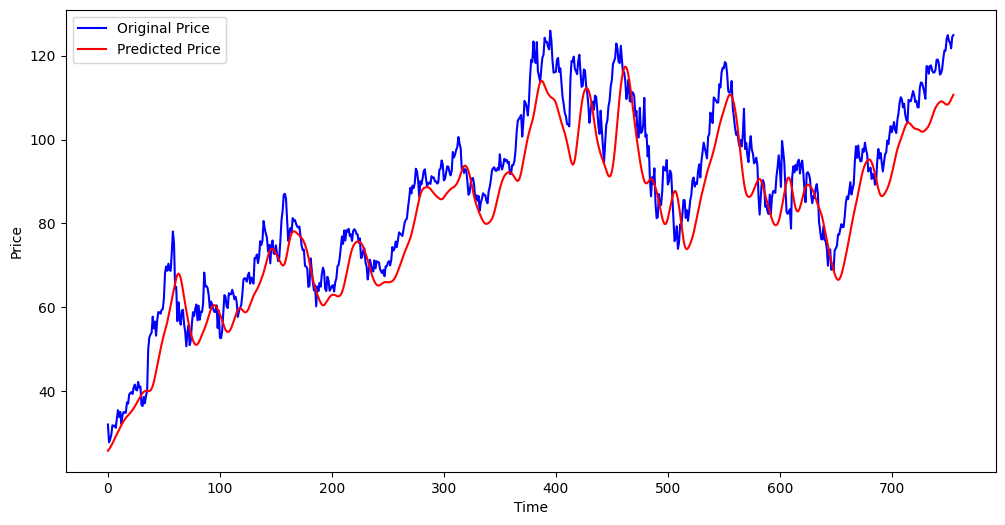

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label = 'Original Price')
plt.plot(y_predicted,'r',label= 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()